In [3]:
%matplotlib ipympl
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import genlaguerre    #genlaguerre(n, alpha)
import matplotlib as mpl

from matplotlib.lines import Line2D
import ipywidgets as widgets
from matplotlib.pyplot import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.ndimage

In [4]:
W = 1.5 #um(10**-6m)

def Factorial(n):
    f=1
    for i in range(1,n+1,1):
        f*=i 
    return f

def Laguerre(rho,l,p):
    l = np.abs(l)
    L = 0
    for m in range(p+1):
        L += (-1)**m * Factorial(l+p) / (Factorial(p-m)*Factorial(l+m)*Factorial(m)) * (2*(rho/W)**2)**m
    return L

def f(rho,l,p):
    l = np.abs(l)
    f = np.sqrt((Factorial(p)*2)/(np.pi*Factorial(l+p))) * np.exp(-(rho/W)**2) * (np.sqrt(2)*rho/W)**l * Laguerre(rho,l,p)
    return f 
    
def u(phi,rho,l,p):
    u = f(rho,l,p) * np.exp(complex(0,1)*l*phi)
    return u

def ux(phi,rho,l1,l2,p,beta,alpha):
    ux = (1*np.cos(beta/2)*u(phi,rho,l1,p) +1*np.exp(complex(0,1)*alpha)*np.sin(beta/2)*u(phi,rho,l2,p) )/np.sqrt(2)
    return ux

def uy(phi,rho,sigma1,sigma2,l1,l2,p,beta,alpha):
    uy = complex(0,1)*( sigma1*np.cos(beta/2)*u(phi,rho,l1,p)  +sigma2*np.exp(complex(0,1)*alpha)*np.sin(beta/2)*u(phi,rho,l2,p) )/np.sqrt(2)  
    return uy

def uintensity(phi,rho,sigma1,sigma2,l1,l2,p,beta,alpha):
    uin = np.sqrt( np.abs(ux(phi,rho,l1,l2,p,beta,alpha))**2 + np.abs(uy(phi,rho,sigma1,sigma2,l1,l2,p,beta,alpha))**2 )
    return uin

In [5]:
def uz(phi,rho,sigma,l,p):
    uz = complex(0,1) * (1 / (np.sqrt(2)*k*rho)) * ( (np.abs(l)-sigma*l) - (2*rho**2/(W**2)) ) * f(rho,l,p) * np.exp(complex(0,1)*(sigma+l)*phi)
    return uz

In [6]:
#數值設定
#綠光波長:530nm  
c=300            #光速       Mm/s (10**6)
w=3.56           #綠光角頻率 peta Hz (10**15)      >t(ps)
k=11.9           #波向量     um^(-1)               >z(um)
T=2*np.pi/w      #週期      femto s (10**-15)
Lambda=530       #波長       nm

 angular spectrum
 
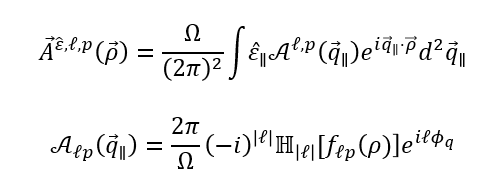

 Hankel Transform
 
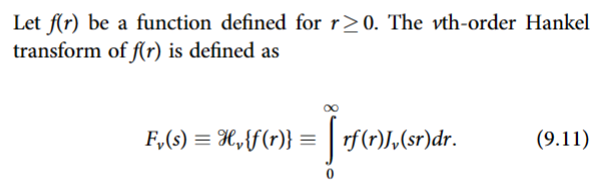

 Bessel Function
 
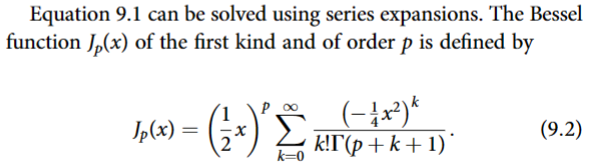

# Bessel Function

In [5]:
def B(l, q, rho, number):
    l = np.abs(l)
    B = 0
    for i in range(0,number+1,1):
        B = B + (-(q*rho)**2/4)**i / (Factorial(i)*Factorial(l+i))
        # B += rho / Factorial(i)
        
    B *= (q*rho/2)**l
    return B

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


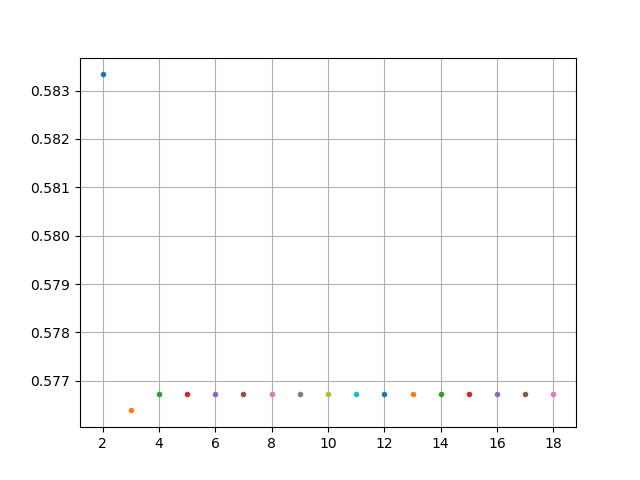

In [6]:
fig, ax = plt.subplots()

number = 1
for i in range(1,18,1):
    number += 1
    print(number)
    ax.plot( number, B(l=1, q=0.5, rho=4, number=number ), '.' )

# ax.set_ylim(0.348, 0.350)
ax.grid()

plt.show()

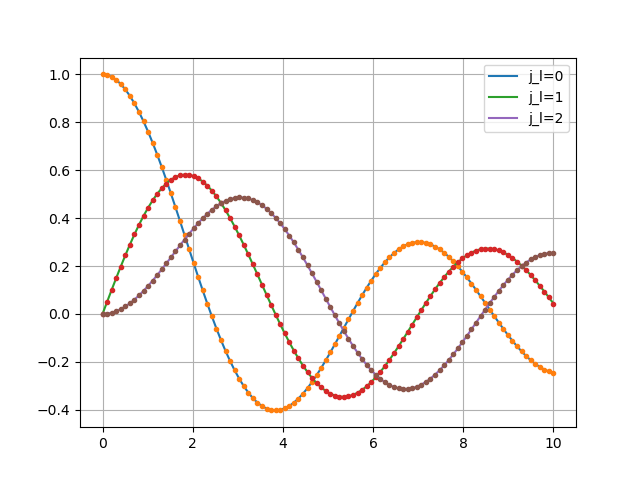

In [7]:
fig, ax = plt.subplots()

rho = np.linspace(0,10,100)

for i in range(3):
    ax.plot( rho, B(i, 1, rho, 20 ) ,label=f'j_l={i}')
    ax.plot( rho, B(i, 1, rho, 80 ), '.')


ax.legend()
ax.grid()
plt.show()

In [8]:
#神秘TYPE判別錯誤寫法
# A = np.array([1, 2, 3, 4], dtype=np.int16)
# B = np.array([0.5, 2.1, 3, 4], dtype=np.float64)

# A *= B
# A =  A * B  

# print(A)

compare

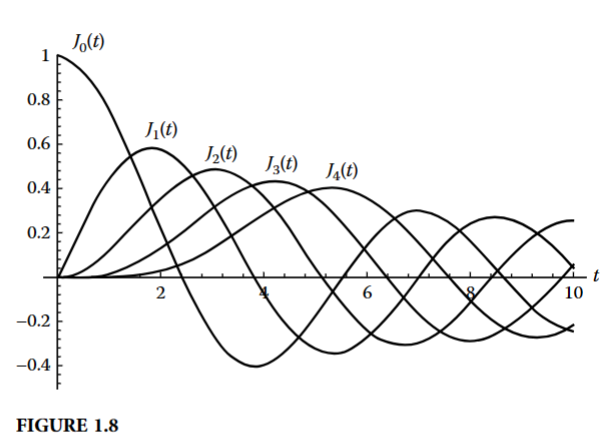

# Hankel Transform

In [9]:
#sim

def fun(q,rho,l,p):
        y = rho*B(l,q,rho,20)*f(rho,l,p)
        return y

def H(q,l,p, h):
    # h = np.power(0.1,3)
    max = 4
    min = 0
    
    sim = 0
    rho = min+h/2
    while (rho<max):
        sim += h/6 * (fun(q, rho-h/2, l, p)+4*fun(q, rho, l, p)+fun(q, rho+h/2, l, p))
        rho += h

    return sim
    

0.3
0.6
0.8999999999999999
1.2
1.5
1.8
2.1
2.4
2.6999999999999997
2.9999999999999996
3.2999999999999994
3.599999999999999


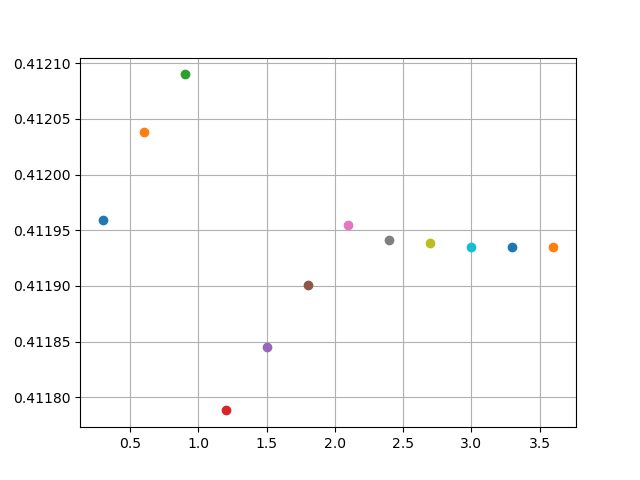

In [10]:
fig, ax = plt.subplots()

number = 0
for i in range(1,13,1):
    number += 0.3
    print(number)
    h = np.power(0.1, number)
    ax.plot( number, H(0.5,1,0,h), 'o' )

ax.grid()

plt.show()

1
2
3
4
5
6
7


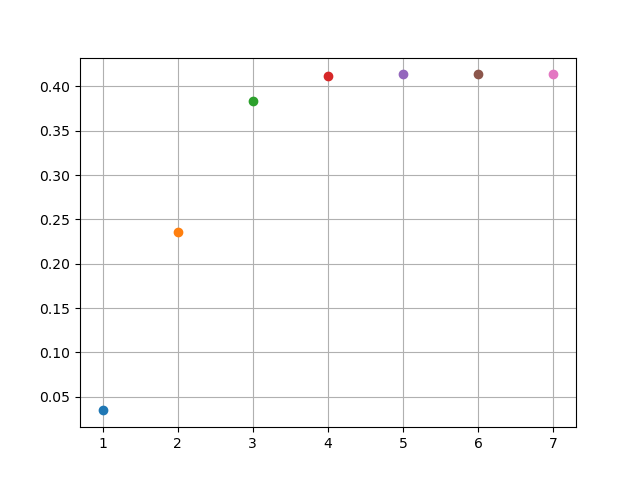

In [11]:
def Hex(q,l,p, h ,max):
    max = max
    min = 0
    
    sim = 0
    rho = min+h/2
    while (rho<max):
        sim += h/6 * (fun(q, rho-h/2, l, p)+4*fun(q, rho, l, p)+fun(q, rho+h/2, l, p))
        rho += h

    return sim

fig, ax = plt.subplots()

number = 0
for i in range(1,8,1):
    number += 1
    print(number)
    h = np.power(0.1, 3)  #number = 3
    ax.plot( number, Hex(0.5,1,0,h,number), 'o' )

ax.grid()

plt.show()

finally

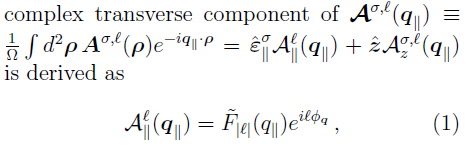

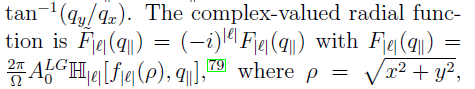

In [12]:
# def angu(phiq,q,l,p):
#     angu = 2*np.pi * ((-complex(0,1))**np.abs(l)) * H(q,l,p,np.power(0.1,2)) * np.exp(complex(0,1)*l*phiq)
#     return (angu)

In [13]:








def anguorigin(phiq,q,l,p):
    angu = 2*np.pi * ((-complex(0,1))**np.abs(l)) * H(q,l,p,np.power(0.1,2)) * np.exp(complex(0,1)*l*phiq)
    return angu








In [14]:
print( anguorigin(phiq=np.pi/2,q=0.5,l=1,p=0) )
print( np.real(anguorigin(phiq=np.pi/2,q=0.5,l=1,p=0)) )
print( np.imag(anguorigin(phiq=np.pi/2,q=0.5,l=1,p=0)) )


R = 3
q = np.linspace(0, R, 200)
phiq = np.linspace(0, 2*np.pi, 200)
#計算2D資料
q, phiq = np.meshgrid(q, phiq)
x, y = q*np.cos(phiq), q*np.sin(phiq)

a = anguorigin(phiq=np.pi/2,q=q[0],l=1,p=0)
print(a[1],np.real(a[1]),np.imag([a[1],a[1]]),type(a[1]),type(np.real(a[1])),type(np.imag(a[1])))
print(type( (5+5j) ))

(2.5882655329993254-1.584855550165521e-16j)
2.5882655329993254
-1.584855550165521e-16
(0.08957329775599022-5.484782619297311e-18j) 0.08957329775599022 [-5.48478262e-18 -5.48478262e-18] <class 'complex'> <class 'float'> <class 'float'>
<class 'complex'>


In [15]:
# R = 3
# q = np.linspace(0, R, 200)
# phiq = np.linspace(0, 2*np.pi, 200)
# #計算2D資料
# q, phiq = np.meshgrid(q, phiq)
# x, y = q*np.cos(phiq), q*np.sin(phiq)

# a = anguorigin(phiq=np.pi/2, q=q[0], l=1, p=0)

# # print(q[0], a)
# print(a)          #not ok
# angureal = []
# anguimag = []
# for i in range(len(q)):         #ok 
#     angureal += [np.real(a[i])]
#     anguimag += [np.imag(a[i])]
    

Output()

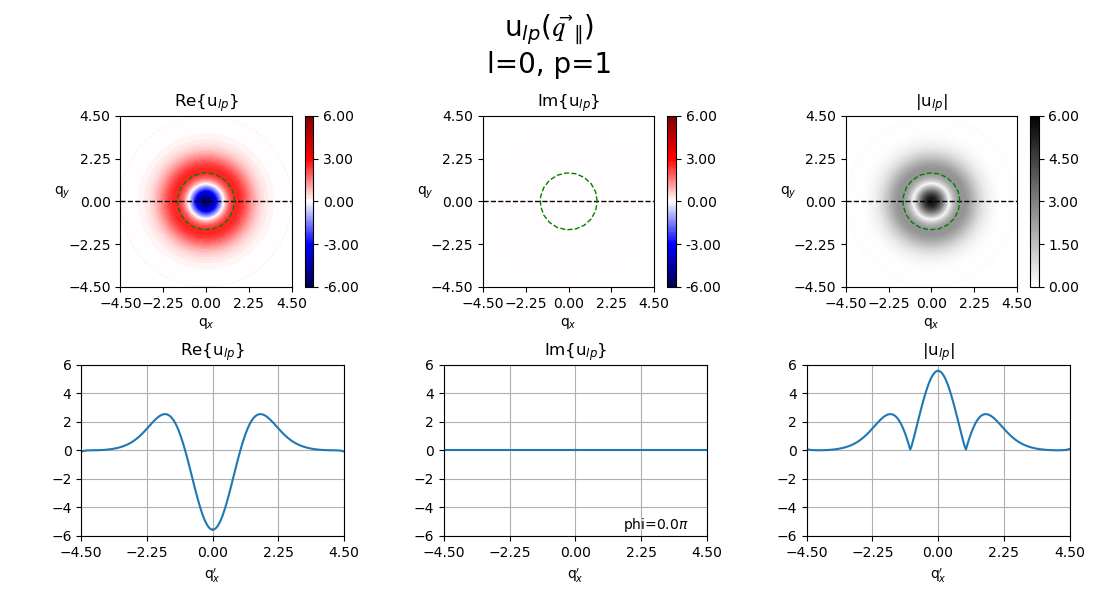

In [16]:
angle = widgets.FloatSlider(value=0, min=0, max=1, step=1/50 ,description='angphi (pi)')
l = widgets.IntText(value=0, min=0, max=10, step=1, description='l:', disabled=False)
p = widgets.IntText(value=1, min=0, max=10, step=1, description='p:', disabled=False)

fig, ax = plt.subplots(2,3,figsize=(11, 6))
for s in range(0,3):
    ax[0,s].set_aspect('equal', adjustable='box')
    ax[0,s].set_box_aspect(1)
#輸入1D資料
W = 1.5 #um(10**-6m) Beam waist 
R = 4.5
linestep = np.linspace(-R, R, 51)
q = np.linspace(0, R, 100)
phiq = np.linspace(0, 2*np.pi, 100)
#計算2D資料
qm, phiq = np.meshgrid(q, phiq)
x, y = qm*np.cos(phiq), qm*np.sin(phiq)

def angu2D(type,phiq,l,p):
    a = anguorigin(phiq, q, l, p)
    if type == 'real':   
        angureal = []
        for i in range(len(q)):        
            angureal += [np.real(a[i])]
        return np.reshape(angureal,len(q))
    elif type == 'imag':
        anguimag = []
        for i in range(len(q)):  
            anguimag += [np.imag(a[i])]
        return np.reshape(anguimag,len(q))
    elif type == 'abs':
        anguabs = []
        for i in range(len(q)):  
            anguabs += [np.abs(a[i])]
        return np.reshape(anguabs,len(q))

def angu3D(type,x,y,l,p):
    a = anguorigin(phiq=np.arctan2(y,x), q=np.sqrt(x**2+y**2), l=l, p=p)
    if type == 'real':   
        angureal = []
        for i in range(len(q)): 
            for j in range(len(q)): 
                angureal += [np.real(a[i][j])]
        return np.reshape(angureal,(len(q),len(q)))
    elif type == 'imag':
        anguimag = []
        for i in range(len(q)): 
            for j in range(len(q)):
                anguimag += [np.imag(a[i][j])]
        return np.reshape(anguimag,(len(q),len(q)))
    elif type == 'abs':
        anguabs = []
        for i in range(len(q)):  
            for j in range(len(q)):
                anguabs += [np.abs(a[i][j])]
        return np.reshape(anguabs,(len(q),len(q)))

#LGbeam實像虛像絕對值產生器
def generateLGbeam(angle,l,p):
    angle = angle*np.pi
    plt.suptitle('u$_{lp}(𝑞 ⃗_{∥})$ \nl='+str(l)+', p='+str(p) ,fontsize=20)
    
    #2D徑軸關係函數
    def plt2d(v,s,world):
        ax[v,s].cla()
        if world=='real':
            ax[v,s].set_title('Re{u$_{lp}$}')
            ax[v,s].plot(q, angu2D('real',angle,l,p), color='#1f77b4')
            ax[v,s].plot(-q, angu2D('real',angle+np.pi,l,p), color='#1f77b4')
        elif world=='img':
            ax[v,s].set_title('Im{u$_{lp}$}')
            ax[v,s].plot(q, angu2D('imag',angle,l,p), color='#1f77b4')
            ax[v,s].plot(-q, angu2D('imag',angle+np.pi,l,p), color='#1f77b4')
            ax[v,s].annotate("phi="+str(angle/np.pi)+"$\pi$ ", xy=(0.68, 0.04),xycoords=ax[v,s])
        elif world=='abs':
            ax[v,s].set_title('|u$_{lp}$|')
            ax[v,s].plot(q,  angu2D('abs',angle,l,p), color='#1f77b4')
            ax[v,s].plot(-q,  angu2D('abs',angle+np.pi,l,p), color='#1f77b4')
        ax[v,s].set_xticks(ticks=np.arange(-R,R+2*R/4,2*R/4))
        ax[v,s].set_yticks(ticks=np.arange(-6,8,2))
        ax[v,s].set_ylim(-6, 6)
        ax[v,s].set_xlim(-R,R)
        ax[v,s].set_xlabel("q$_{x}'$")
        ax[v,s].grid()

    #3D整體關係函數
    def plt3d(v,s,world):
        ax[v,s].cla()
        if world=='real':
            contourreal=ax[v,s].contourf(x, y, angu3D('real',x,y,l,p), levels=np.linspace(-6,6,100), cmap='seismic')
            ax[v,s].add_line(Line2D(linestep*np.cos(angle), linestep*np.sin(angle),linewidth=1, linestyle='--', color='black'))
            ax[v,s].set_title('Re{u$_{lp}$}')
        elif world=='img':
            contourimg=ax[v,s].contourf(x, y, angu3D('imag',x,y,l,p), levels=np.linspace(-6,6,100), cmap='seismic')
            ax[v,s].add_line(Line2D(linestep*np.cos(angle), linestep*np.sin(angle),linewidth=1, linestyle='--', color='black'))
            ax[v,s].set_title('Im{u$_{lp}$}')
        elif world=='abs':
            contourabs=ax[v,s].contourf(x, y, angu3D('abs',x,y,l,p), levels=np.linspace(0,6,100), cmap='gist_yarg')
            ax[v,s].add_line(Line2D(linestep*np.cos(angle), linestep*np.sin(angle),linewidth=1, linestyle='--', color='black'))
            ax[v,s].set_title('|u$_{lp}$|')
        ax[v,s].plot(W*np.cos(np.linspace(0, 2*np.pi, 20)),W*np.sin(np.linspace(0, 2*np.pi, 20)),linewidth=1, linestyle='--', color='g')
        ax[v,s].set_aspect('equal', adjustable='box')
        ax[v,s].set_box_aspect(1)
        ax[v,s].set_ylim(-R,R)
        ax[v,s].set_xlim(-R,R)
        ax[v,s].set_xlabel('q$_{x}$')
        ax[v,s].set_ylabel('q$_{y}$',rotation=0)
        ax[v,s].set_xticks(ticks=np.arange(-R,R+2*R/4,2*R/4))
        ax[v,s].set_yticks(ticks=np.arange(-R,R+2*R/4,2*R/4))
        
    #繪圖
    plt2d(1,0,'real')
    plt2d(1,1,'img')
    plt2d(1,2,'abs')
    plt3d(0,0,'real')
    plt3d(0,1,'img')
    plt3d(0,2,'abs')

fig.colorbar(ax[0,0].contourf(x, y, (x+y), levels=np.linspace(-6,6,100), cmap='seismic'), ax=ax[0,0], format="{x:.2f}", ticks=np.linspace(-6,6, 5))
fig.colorbar(ax[0,0].contourf(x, y, (x+y), levels=np.linspace(-6,6,100), cmap='seismic'), ax=ax[0,1], format="{x:.2f}", ticks=np.linspace(-6,6, 5))
fig.colorbar(ax[0,0].contourf(x, y, (x+y), levels=np.linspace(0,6,100), cmap='gist_yarg'), ax=ax[0,2], format="{x:.2f}", ticks=np.linspace(0,6, 5))

#滑桿控制 
out3D = widgets.interactive_output(generateLGbeam, {'angle':angle, 'l':l, 'p':p })
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.HBox([l,p]), widgets.Label('parameter:'), widgets.HBox([angle])])
display(ui , out3D)

plt.tight_layout()
plt.show()    

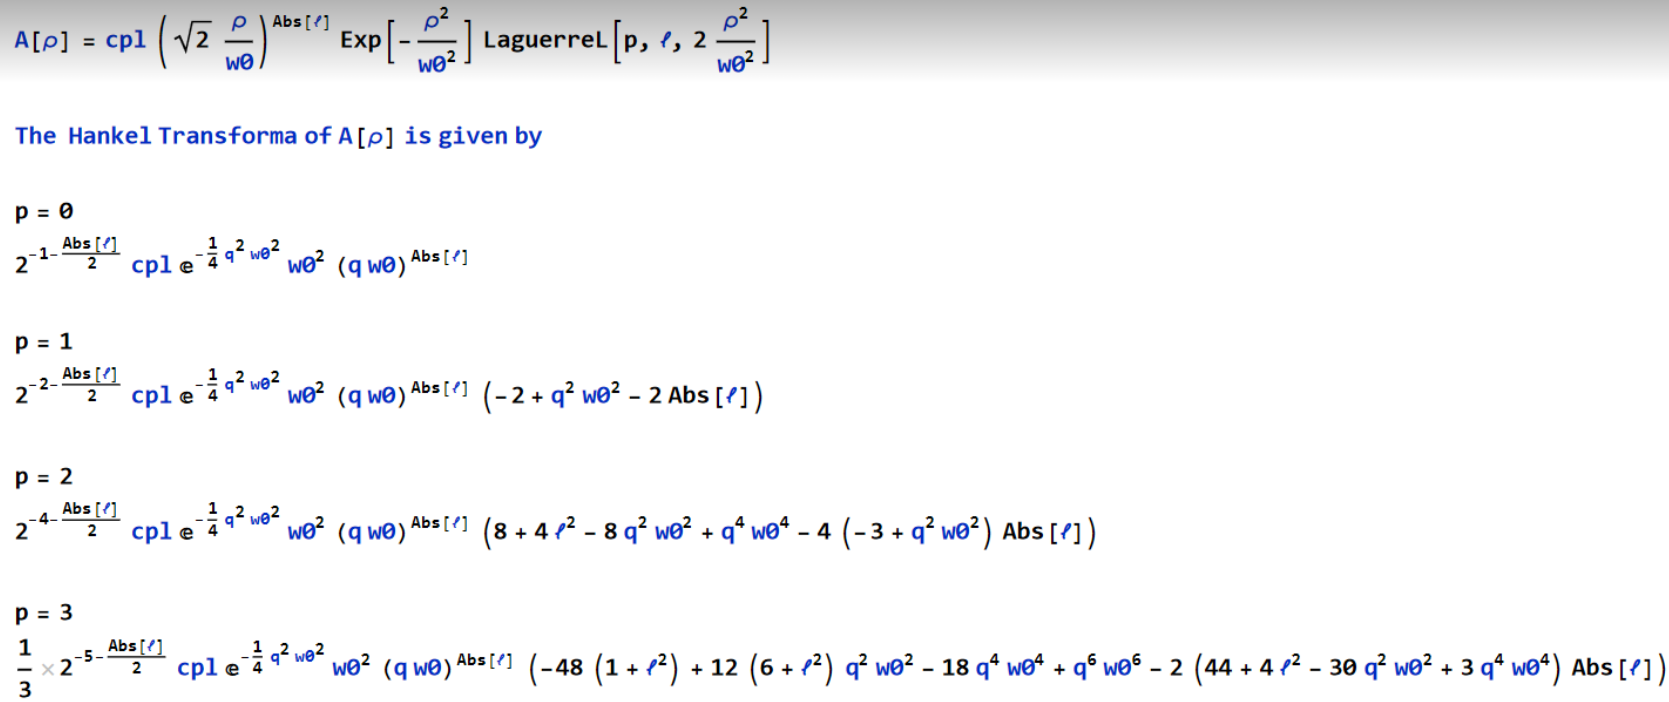

In [1]:

def clp(l,p):
    clp = np.sqrt((Factorial(p)*2)/(np.pi*Factorial(np.abs(l)+p)))
    return clp

def uanalytic(phiq,q,l,p):
    if p == 0:
        uanalytic = 2*np.pi*(-complex(0,1))**np.abs(l)*2**(-1-np.abs(l)/2) * clp(l,p) * np.exp(-q**2*W**2/4) * W**2 * (q*W)**np.abs(l)* np.exp(complex(0,1)*l*phiq)
        return uanalytic
    if p == 1:
        uanalytic = 2*np.pi*(-complex(0,1))**np.abs(l)*2**(-2-np.abs(l)/2) * clp(l,p) * np.exp(-q**2*W**2/4) * W**2 * (q*W)**np.abs(l) * (-2+q**2*W**2-2*np.abs(l))* np.exp(complex(0,1)*l*phiq)
        return uanalytic
    if p == 2:
        uanalytic = 2*np.pi*(-complex(0,1))**np.abs(l)*2**(-4-np.abs(l)/2) * clp(l,p) * np.exp(-q**2*W**2/4) * W**2 * (q*W)**np.abs(l) * (8+4*l**2-8*q**2*W**2+q**4*W**4-4*(-3+q**2*W**2)*np.abs(l))* np.exp(complex(0,1)*l*phiq)
        return uanalytic
    if p == 3:
        uanalytic = 2*np.pi*(-complex(0,1))**np.abs(l)*2**(-5-np.abs(l)/2)/3 * clp(l,p) * np.exp(-q**2*W**2/4) * W**2 * (q*W)**np.abs(l) * (-48*(1+l**2)+12+(6+l**2)*q**2*W**2-18*q**4*W**4+q**6*W**6-2*(44+4*l**2-30*q**2*W**2+3*q**4*W**4)*np.abs(l))* np.exp(complex(0,1)*l*phiq)
        return uanalytic
    

Output()

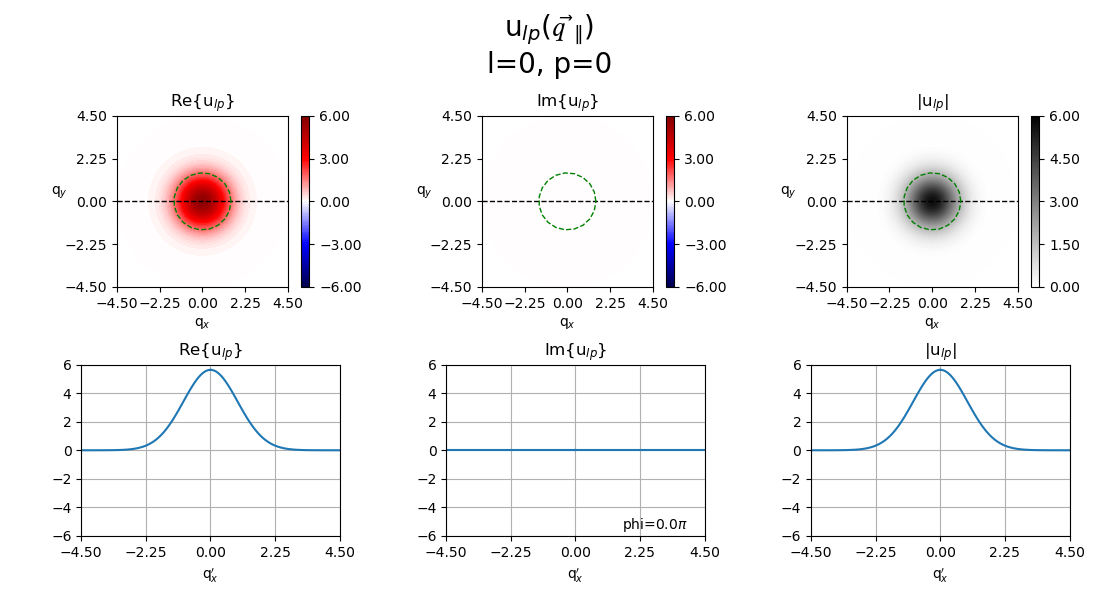

In [7]:
angle = widgets.FloatSlider(value=0, min=0, max=1, step=1/50 ,description='angphi (pi)')
l = widgets.IntText(value=0, min=0, max=10, step=1, description='l:', disabled=False)
p = widgets.IntText(value=0, min=0, max=3, step=1, description='p:', disabled=False)

fig, ax = plt.subplots(2,3,figsize=(11, 6))
for s in range(0,3):
    ax[0,s].set_aspect('equal', adjustable='box')
    ax[0,s].set_box_aspect(1)
#輸入1D資料
W = 1.5 #um(10**-6m) Beam waist 
R = 4.5
linestep = np.linspace(-R, R, 51)
q = np.linspace(0, R, 100)
phiq = np.linspace(0, 2*np.pi, 100)
#計算2D資料
q, phiq = np.meshgrid(q, phiq)
x, y = q*np.cos(phiq), q*np.sin(phiq)

#LGbeam實像虛像絕對值產生器
def generateLGbeam(angle,l,p):
    angle = angle*np.pi
    plt.suptitle('u$_{lp}(𝑞 ⃗_{∥})$ \nl='+str(l)+', p='+str(p) ,fontsize=20)
    
    #2D徑軸關係函數
    def plt2d(v,s,world):
        ax[v,s].cla()
        if world=='real':
            ax[v,s].set_title('Re{u$_{lp}$}')
            ax[v,s].plot(q[0], np.real(uanalytic(angle,q[0],l,p)), color='#1f77b4')
            ax[v,s].plot(-q[0], np.real(uanalytic(angle+np.pi,q[0],l,p)), color='#1f77b4')
        elif world=='img':
            ax[v,s].set_title('Im{u$_{lp}$}')
            ax[v,s].plot(q[0], np.imag(uanalytic(angle,q[0],l,p)), color='#1f77b4')
            ax[v,s].plot(-q[0], np.imag(uanalytic(angle+np.pi,q[0],l,p)), color='#1f77b4')
            ax[v,s].annotate("phi="+str(angle/np.pi)+"$\pi$ ", xy=(0.68, 0.04),xycoords=ax[v,s])
        elif world=='abs':
            ax[v,s].set_title('|u$_{lp}$|')
            ax[v,s].plot(q[0], np.abs(uanalytic(angle,q[0],l,p)), color='#1f77b4')
            ax[v,s].plot(-q[0], np.abs(uanalytic(angle+np.pi,q[0],l,p)), color='#1f77b4')
        ax[v,s].set_xticks(ticks=np.arange(-R,R+2*R/4,2*R/4))
        ax[v,s].set_yticks(ticks=np.arange(-6,8,2))
        ax[v,s].set_ylim(-6, 6)
        ax[v,s].set_xlim(-R,R)
        ax[v,s].set_xlabel("q$_{x}'$")
        ax[v,s].grid()

    #3D整體關係函數
    def plt3d(v,s,world):
        ax[v,s].cla()
        if world=='real':
            contourreal=ax[v,s].contourf(x, y, np.real(uanalytic(phiq,q,l,p)), levels=np.linspace(-6,6,100), cmap='seismic')
            ax[v,s].add_line(Line2D(linestep*np.cos(angle), linestep*np.sin(angle),linewidth=1, linestyle='--', color='black'))
            ax[v,s].set_title('Re{u$_{lp}$}')
        elif world=='img':
            contourimg=ax[v,s].contourf(x, y, np.imag(uanalytic(phiq,q,l,p)), levels=np.linspace(-6,6,100), cmap='seismic')
            ax[v,s].add_line(Line2D(linestep*np.cos(angle), linestep*np.sin(angle),linewidth=1, linestyle='--', color='black'))
            ax[v,s].set_title('Im{u$_{lp}$}')
        elif world=='abs':
            contourabs=ax[v,s].contourf(x, y, np.abs(uanalytic(phiq,q,l,p)), levels=np.linspace(0,6,100), cmap='gist_yarg')
            ax[v,s].add_line(Line2D(linestep*np.cos(angle), linestep*np.sin(angle),linewidth=1, linestyle='--', color='black'))
            ax[v,s].set_title('|u$_{lp}$|')
        ax[v,s].plot(W*np.cos(np.linspace(0, 2*np.pi, 20)),W*np.sin(np.linspace(0, 2*np.pi, 20)),linewidth=1, linestyle='--', color='g')
        ax[v,s].set_aspect('equal', adjustable='box')
        ax[v,s].set_box_aspect(1)
        ax[v,s].set_ylim(-R,R)
        ax[v,s].set_xlim(-R,R)
        ax[v,s].set_xlabel('q$_{x}$')
        ax[v,s].set_ylabel('q$_{y}$',rotation=0)
        ax[v,s].set_xticks(ticks=np.arange(-R,R+2*R/4,2*R/4))
        ax[v,s].set_yticks(ticks=np.arange(-R,R+2*R/4,2*R/4))
        
    #繪圖
    plt2d(1,0,'real')
    plt2d(1,1,'img')
    plt2d(1,2,'abs')
    plt3d(0,0,'real')
    plt3d(0,1,'img')
    plt3d(0,2,'abs')

fig.colorbar(ax[0,0].contourf(x, y, (x+y), levels=np.linspace(-6,6,100), cmap='seismic'), ax=ax[0,0], format="{x:.2f}", ticks=np.linspace(-6,6, 5))
fig.colorbar(ax[0,0].contourf(x, y, (x+y), levels=np.linspace(-6,6,100), cmap='seismic'), ax=ax[0,1], format="{x:.2f}", ticks=np.linspace(-6,6, 5))
fig.colorbar(ax[0,0].contourf(x, y, (x+y), levels=np.linspace(0,6,100), cmap='gist_yarg'), ax=ax[0,2], format="{x:.2f}", ticks=np.linspace(0,6, 5))

#滑桿控制 
out3D = widgets.interactive_output(generateLGbeam, {'angle':angle, 'l':l, 'p':p })
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.HBox([l,p]), widgets.Label('parameter:'), widgets.HBox([angle])])
display(ui , out3D)

plt.tight_layout()
plt.show()    

In [19]:
l=1
p=0
print('x =',x,'y =',y,'\nand ....', anguorigin(phiq=np.arctan2(y,x), q=np.sqrt(x[0]**2+y[0]**2), l=l, p=p))

x = [[0.         0.04545455 0.09090909 ... 4.40909091 4.45454545 4.5       ]
 [0.         0.04536303 0.09072606 ... 4.40021398 4.44557701 4.49094004]
 [0.         0.04508886 0.09017771 ... 4.37361895 4.4187078  4.46379666]
 ...
 [0.         0.04508886 0.09017771 ... 4.37361895 4.4187078  4.46379666]
 [0.         0.04536303 0.09072606 ... 4.40021398 4.44557701 4.49094004]
 [0.         0.04545455 0.09090909 ... 4.40909091 4.45454545 4.5       ]] y = [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.88290544e-03  5.76581088e-03 ...  2.79641828e-01
   2.82524733e-01  2.85407638e-01]
 [ 0.00000000e+00  5.75420244e-03  1.15084049e-02 ...  5.58157636e-01
   5.63911839e-01  5.69666041e-01]
 ...
 [-0.00000000e+00 -5.75420244e-03 -1.15084049e-02 ... -5.58157636e-01
  -5.63911839e-01 -5.69666041e-01]
 [-0.00000000e+00 -2.88290544e-03 -5.76581088e-03 ... -2.79641828e-01
  -2.82524733e-01 -2.85407638e-01]
 [-0.00000000e+00 

In [20]:
np.append([[1]],[[2]],axis=0)

array([[1],
       [2]])

In [21]:
a = np.array([[1,1,1],[1,1,1]])
b = np.array([[2,2,2]])
c = np.append(a,b, axis=0)
print(c)

[[1 1 1]
 [1 1 1]
 [2 2 2]]


In [81]:
a = [[1,1,1]]
b = [[2,2,2]]
c = np.append(a,b, axis=0)
print(c)

[[1 1 1]
 [2 2 2]]


In [78]:
# np.append([[1, 2, 3], [4, 5, 6]], [[7, 8, 9]], axis=0)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [88]:
def angu3D(type,x,y,l,p):
    a = anguorigin(phiq=np.arctan2(y,x), q=np.sqrt(x**2+y**2), l=l, p=p)
    if type == 'real':   
        angureal = []
        for i in range(len(q)): 
            angurealin = []
            for j in range(len(q)): 
                angurealin += [np.real(a[i][j])]
            angureal = np.append(angureal,angurealin)
        return np.reshape(angureal,(len(q),len(q)))

l=1
p=0
print('x =',x,'y =',y,'\nand ....', angu3D('real',x,y,l,p))

x = [[0.         0.04545455 0.09090909 ... 4.40909091 4.45454545 4.5       ]
 [0.         0.04536303 0.09072606 ... 4.40021398 4.44557701 4.49094004]
 [0.         0.04508886 0.09017771 ... 4.37361895 4.4187078  4.46379666]
 ...
 [0.         0.04508886 0.09017771 ... 4.37361895 4.4187078  4.46379666]
 [0.         0.04536303 0.09072606 ... 4.40021398 4.44557701 4.49094004]
 [0.         0.04545455 0.09090909 ... 4.40909091 4.45454545 4.5       ]] y = [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.88290544e-03  5.76581088e-03 ...  2.79641828e-01
   2.82524733e-01  2.85407638e-01]
 [ 0.00000000e+00  5.75420244e-03  1.15084049e-02 ...  5.58157636e-01
   5.63911839e-01  5.69666041e-01]
 ...
 [-0.00000000e+00 -5.75420244e-03 -1.15084049e-02 ... -5.58157636e-01
  -5.63911839e-01 -5.69666041e-01]
 [-0.00000000e+00 -2.88290544e-03 -5.76581088e-03 ... -2.79641828e-01
  -2.82524733e-01 -2.85407638e-01]
 [-0.00000000e+00 

In [ ]:
globals()['verts'+str(n)]

In [95]:
print(np.array([1,2,3]).size)
print(np.array([[1],[2],[3]]).size)

3
3


In [96]:
np.array([1,2,3])

array([1, 2, 3])

In [97]:
np.array([[1],[2],[3]])

array([[1],
       [2],
       [3]])

Output()

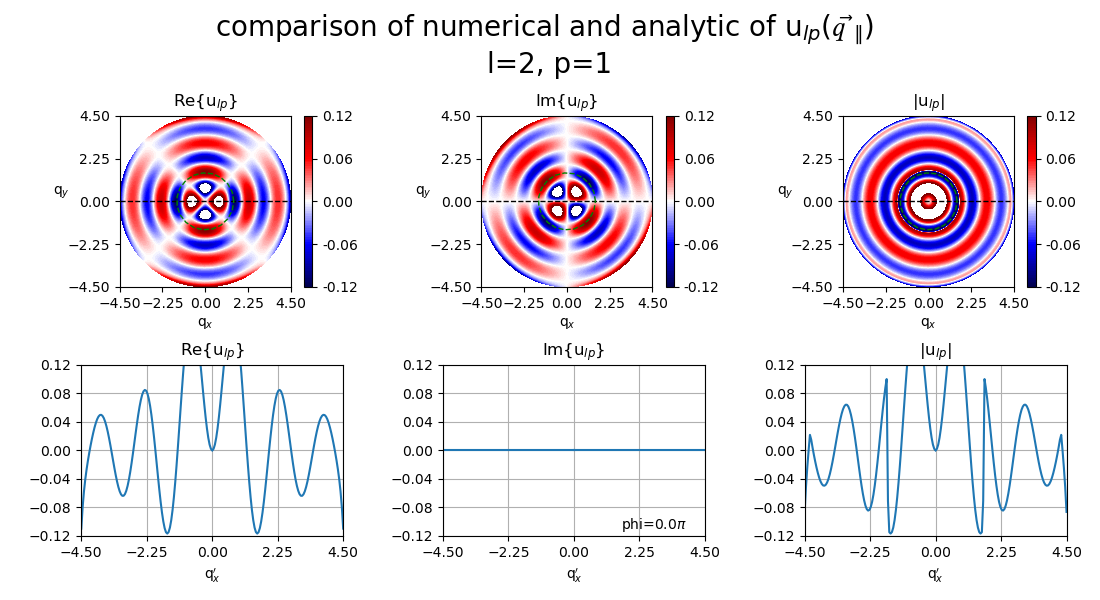

In [19]:
angle = widgets.FloatSlider(value=0, min=0, max=1, step=1/50 ,description='angphi (pi)')
l = widgets.IntText(value=2, min=0, max=10, step=1, description='l:', disabled=False)
p = widgets.IntText(value=1, min=0, max=10, step=1, description='p:', disabled=False)

fig, ax = plt.subplots(2,3,figsize=(11, 6))
for s in range(0,3):
    ax[0,s].set_aspect('equal', adjustable='box')
    ax[0,s].set_box_aspect(1)
#輸入1D資料
W = 1.5 #um(10**-6m) Beam waist 
R = 4.5
linestep = np.linspace(-R, R, 51)
q = np.linspace(0, R, 100)
phiq = np.linspace(0, 2*np.pi, 100)
#計算2D資料
qm, phiq = np.meshgrid(q, phiq)
x, y = qm*np.cos(phiq), qm*np.sin(phiq)

def errorangu2D(type,phiq,l,p):
    a = anguorigin(phiq, q, l, p)
    b = uanalytic(phiq,q,l,p)
    if type == 'real':   
        angureal = []
        for i in range(len(q)):        
            angureal += [(np.real(b[i])-np.real(a[i]))]
        return np.reshape(angureal,len(q))
    elif type == 'imag':
        anguimag = []
        for i in range(len(q)):  
            anguimag += [(np.imag(b[i])-np.imag(a[i]))]
        return np.reshape(anguimag,len(q))
    elif type == 'abs':
        anguabs = []
        for i in range(len(q)):  
            anguabs += [(np.abs(b[i])-np.abs(a[i]))]
        return np.reshape(anguabs,len(q))

def errorangu3D(type,x,y,l,p):
    a = anguorigin(phiq=np.arctan2(y,x), q=np.sqrt(x**2+y**2), l=l, p=p)
    b = uanalytic(phiq=np.arctan2(y,x), q=np.sqrt(x**2+y**2), l=l, p=p)
    if type == 'real':   
        angureal = []
        for i in range(len(q)): 
            for j in range(len(q)): 
                angureal += [np.real(b[i][j])-np.real(a[i][j])]
        return np.reshape(angureal,(len(q),len(q)))
    elif type == 'imag':
        anguimag = []
        for i in range(len(q)): 
            for j in range(len(q)):
                anguimag += [np.imag(b[i][j])-np.imag(a[i][j])]
        return np.reshape(anguimag,(len(q),len(q)))
    elif type == 'abs':
        anguabs = []
        for i in range(len(q)):  
            for j in range(len(q)):
                anguabs += [np.abs(b[i][j])-np.abs(a[i][j])]
        return np.reshape(anguabs,(len(q),len(q)))

#LGbeam實像虛像絕對值產生器
def generateLGbeam(angle,l,p):
    angle = angle*np.pi
    plt.suptitle('comparison of numerical and analytic of u$_{lp}(𝑞 ⃗_{∥})$  \nl='+str(l)+', p='+str(p) ,fontsize=20)
    
    #2D徑軸關係函數
    def plt2d(v,s,world):
        ax[v,s].cla()
        if world=='real':
            ax[v,s].set_title('Re{u$_{lp}$}')
            ax[v,s].plot(q, errorangu2D('real',angle,l,p), color='#1f77b4')
            ax[v,s].plot(-q, errorangu2D('real',angle+np.pi,l,p), color='#1f77b4')
        elif world=='img':
            ax[v,s].set_title('Im{u$_{lp}$}')
            ax[v,s].plot(q, errorangu2D('imag',angle,l,p), color='#1f77b4')
            ax[v,s].plot(-q, errorangu2D('imag',angle+np.pi,l,p), color='#1f77b4')
            ax[v,s].annotate("phi="+str(angle/np.pi)+"$\pi$ ", xy=(0.68, 0.04),xycoords=ax[v,s])
        elif world=='abs':
            ax[v,s].set_title('|u$_{lp}$|')
            ax[v,s].plot(q,  errorangu2D('abs',angle,l,p), color='#1f77b4')
            ax[v,s].plot(-q,  errorangu2D('abs',angle+np.pi,l,p), color='#1f77b4')
        ax[v,s].set_xticks(ticks=np.arange(-R,R+2*R/4,2*R/4))
        ax[v,s].set_yticks(ticks=np.arange(-0.12,0.16,0.04))
        ax[v,s].set_ylim(-0.12, 0.12)
        ax[v,s].set_xlim(-R,R)
        ax[v,s].set_xlabel("q$_{x}'$")
        ax[v,s].grid()

    #3D整體關係函數
    def plt3d(v,s,world):
        ax[v,s].cla()
        if world=='real':
            contourreal=ax[v,s].contourf(x, y, errorangu3D('real',x,y,l,p), levels=np.linspace(-0.12,0.12,100), cmap='seismic')
            ax[v,s].add_line(Line2D(linestep*np.cos(angle), linestep*np.sin(angle),linewidth=1, linestyle='--', color='black'))
            ax[v,s].set_title('Re{u$_{lp}$}')
        elif world=='img':
            contourimg=ax[v,s].contourf(x, y, errorangu3D('imag',x,y,l,p), levels=np.linspace(-0.12,0.12,100), cmap='seismic')
            ax[v,s].add_line(Line2D(linestep*np.cos(angle), linestep*np.sin(angle),linewidth=1, linestyle='--', color='black'))
            ax[v,s].set_title('Im{u$_{lp}$}')
        elif world=='abs':
            contourabs=ax[v,s].contourf(x, y, errorangu3D('abs',x,y,l,p), levels=np.linspace(-0.12,0.12,100), cmap='seismic')
            ax[v,s].add_line(Line2D(linestep*np.cos(angle), linestep*np.sin(angle),linewidth=1, linestyle='--', color='black'))
            ax[v,s].set_title('|u$_{lp}$|')
        ax[v,s].plot(W*np.cos(np.linspace(0, 2*np.pi, 20)),W*np.sin(np.linspace(0, 2*np.pi, 20)),linewidth=1, linestyle='--', color='g')
        ax[v,s].set_aspect('equal', adjustable='box')
        ax[v,s].set_box_aspect(1)
        ax[v,s].set_ylim(-R,R)
        ax[v,s].set_xlim(-R,R)
        ax[v,s].set_xlabel('q$_{x}$')
        ax[v,s].set_ylabel('q$_{y}$',rotation=0)
        ax[v,s].set_xticks(ticks=np.arange(-R,R+2*R/4,2*R/4))
        ax[v,s].set_yticks(ticks=np.arange(-R,R+2*R/4,2*R/4))
        
    #繪圖
    plt2d(1,0,'real')
    plt2d(1,1,'img')
    plt2d(1,2,'abs')
    plt3d(0,0,'real')
    plt3d(0,1,'img')
    plt3d(0,2,'abs')

fig.colorbar(ax[0,0].contourf(x, y, (x+y), levels=np.linspace(-0.12,0.12,100), cmap='seismic'), ax=ax[0,0], format="{x:.2f}", ticks=np.linspace(-0.12,0.12, 5))
fig.colorbar(ax[0,0].contourf(x, y, (x+y), levels=np.linspace(-0.12,0.12,100), cmap='seismic'), ax=ax[0,1], format="{x:.2f}", ticks=np.linspace(-0.12,0.12, 5))
fig.colorbar(ax[0,0].contourf(x, y, (x+y), levels=np.linspace(-0.12,0.12,100), cmap='seismic'), ax=ax[0,2], format="{x:.2f}", ticks=np.linspace(-0.12,0.12, 5))

#滑桿控制 
out3D = widgets.interactive_output(generateLGbeam, {'angle':angle, 'l':l, 'p':p })
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.HBox([l,p]), widgets.Label('parameter:'), widgets.HBox([angle])])
display(ui , out3D)

plt.tight_layout()
plt.show()   